# Método de Gauss-Newton aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Steepest descent à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método steepest descente é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

A proposta do código é encontrar o mínimo da função através de muitas iterações.

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, ticker
from visual import histeq

## Plotando a função

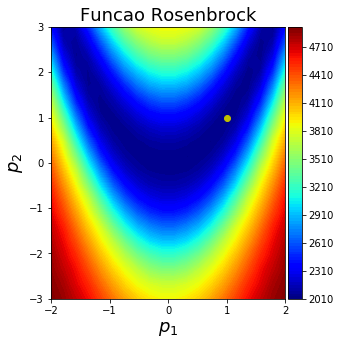

In [2]:
#definindo os parâmetros
p1 = np.linspace(-2., 2., 20)
p2 = np.linspace(-3., 3., 20)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = 100.*(p2 - p1*p1)*(p2 - p1*p1) + (p1 - 1)*(p1 - 1)

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(20,20))

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()


# Algoritmo Gauss-Newton

In [3]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100.*(p0[1] - p0[0]*p0[0])*(p0[1] - p0[0]*p0[0]) + (p0[0] - 1)*(p0[0] - 1)
    
    return phi

# calculando gradiente de phi
def res_rosenbrock(p0):
    '''
    Calcula o vetor de resíduos da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    res: array 1D - vetor de resíduos calculado em cada ponto (p1, p2)
    '''
    res = np.zeros(2)
    res[0] = 10.*(p0[1] - p0[0]*p0[0]) 
    res[1] = p0[0] - 1.

    return res

# calculando a hessiana de phi
def jacobi_rosenbrock(p0):
    '''
    Calcula a Jacobiana da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    A: array 2D - matriz Jacobiana calculada em cada ponto (p1, p2)
    '''
    A = np.zeros((2,2))
    A[0,0] = -20.*p0[0]
    A[0,1] = 10.
    A[1,0] = 1.
    
    return A

In [4]:
# chute inicial
p01 = -1.
p02 = 3.

# vetor de parâmetros inicial
p0 = np.array([p01,p02]) 

# valor da função no chute inicial
phi0 = rosenbrock(p0)

# armazenando o chute inicial
p1_list = [p01]
p2_list = [p02]
phi_list = [phi0]

# número de iteração máximo
itmax = 100

# critério de parada
epsilon = 1e-2

In [5]:
for i in range(itmax):
    # calculando o valor da função e do gradiente em p0
    res = res_rosenbrock(p0)
    A = jacobi_rosenbrock(p0)
    ATA = np.dot(A.T,A)
    
    # calculando p e atualizando para a próxima iteração
    p = p0 - np.linalg.solve(ATA, np.dot(A.T,res))
    phi = rosenbrock(p)
    
    # armazenando os resultados em listas para o plot
    phi_list.append(phi0)
    p1_list.append(p0[0])
    p2_list.append(p0[1])
    
    # printa os valores
    print 'itreação: %3d   p1: %.2f   p2: %.2f   f: %.2e' % (i, p[0], p[1], phi)
        
    # critério de parada
    if abs(phi - phi0) <= epsilon:
        break
    else:
        # atualizando para a próxima iteração
        p0 = p.copy()
        phi0 = phi

itreação:   0   p1: 1.00   p2: -3.00   f: 1.60e+03
itreação:   1   p1: 1.00   p2: 1.00   f: 1.26e-27
itreação:   2   p1: 1.00   p2: 1.00   f: 0.00e+00


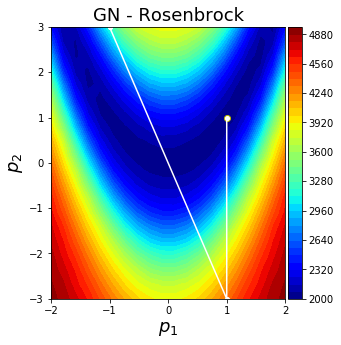

In [6]:
#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=8)
plt.title('GN - Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
plt.show()

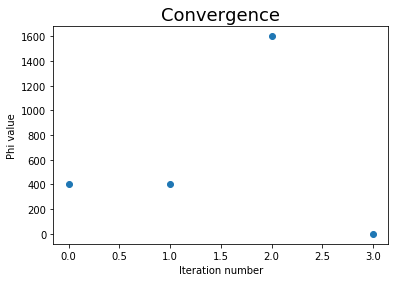

In [7]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
plt.show()